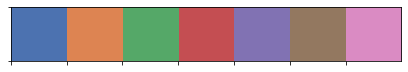

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import statsmodels.api as sm
from IPython.display import display, HTML

USE_DARK = False
palette = cmap = 'deep'
c0, c1, c2, c3, c4, c5, c6 = sns.color_palette(palette, 7)
sns.palplot(sns.color_palette(palette, 7))

rc = {
    'font.family': 'IBM Plex Sans',
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.figsize': (12, 7),
    'grid.alpha': 0,
}

if USE_DARK:
    COLORS = {
        'fg': '0.8',
        'fg_muted': '0.7',
        'bg': '0.1',
        'bg_muted': '0.2'
    }
    SNS_STYLE='dark'
else:
    COLORS = {
        'fg': '0.1',
        'fg_muted': '0.2',
        'bg': '0.99',
        'bg_muted': '0.95',
    }
    SNS_STYLE='white'

rc.update({
    'text.color': COLORS['fg'],
    'figure.facecolor': COLORS['bg'],
    'axes.facecolor': COLORS['bg'],
    'axes.edgecolor': COLORS['bg_muted'],
    'axes.labelcolor': COLORS['fg_muted'],
    'xtick.color': COLORS['fg'],
    'ytick.color': COLORS['fg'],
    'legend.edgecolor': COLORS['bg_muted'],
})
    
sns.set(context='talk', style=SNS_STYLE, palette=palette, rc=rc)

In [2]:
sheets = pd.read_excel("/home/nicholas/Dropbox/northeastern/misinfo/exp1-data.xlsx", 
                       sheet_name=None)

data, just_belief, part1_raw, part2_raw = sheets.values()

In [3]:
data.drop(index=[388, 389, 390, 391], inplace=True)

In [4]:
questions = ['daddy-long-legs', 'women-talk-more', 'wifi-no-cause-cancer', 
             'illegal-immigrants-crime-less', 'mozart-boosts-iq', 'sugar-hyperactive', 
            'ostriches-hide-head', 'cancer-alternative-medicine', 'caucasian-blue-eyes', 
             'sleepwalkers-complex-tasks', 'universal-gestures', 
             'taller-in-morning', 'urine-jellyfish-sting', 'opera-shatter-glass', 'carrots-skin-orange', 
             '90%-communication-nonverbal', 'yawning-contagious', 'goldfish-short-memory', 
             'use-10%-of-brain', 'dogs-chocolate-bad', 'laughing-improves-vascular', 
            'alcohol-cooks-off', 'testosterone-helps-memory', 'gender-pay-gap', 'glasses-linked-iq', 
             'cops-dying-more', 'cockroach-headless',
            'gun-murders-highest', 'redheads-dying-out', 'placenta-side-gender', '80%-ocean-unexplored', 
             'honey-antibacterial',
            'sharks-no-cancer', 'tsunami-caused-earthquake', 'marmite-meat-based', 
             'elephants-never-forget', 'achoo', 'hypnosis-pain',
            'saunas-sweat-toxins', 'dogs-smell-cancer', 'humans-regrow-tips', 'mercury-vaccines-harmful']

In [5]:
exp2_questions = ['daddy-long-legs', 'women-talk-more', 'wifi-no-cause-cancer', 'illegal-immigrants-crime-less', 'mozart-boosts-iq', 'sugar-hyperactive', 
        'ostriches-hide-head', 'cancer-alternative-medicine', 'caucasian-blue-eyes', 'sleepwalkers-complex-tasks', 'universal-gestures', 
         'taller-in-morning', 'urine-jellyfish-sting', 'opera-shatter-glass', 'carrots-skin-orange', '90%-communication-nonverbal',
        'yawning-contagious', 'goldfish-short-memory', 'use-10%-of-brain', 'dogs-chocolate-bad', 'laughing-improves-vascular', 
        'alcohol-cooks-off', 'testosterone-helps-memory', 'gender-pay-gap', 'glasses-linked-iq', 'cops-dying-more', 'cockroach-headless',
        'gun-murders-highest', 'redheads-dying-out', 'placenta-side-gender', '80%-ocean-unexplored', 'honey-antibacterial',
        'sharks-no-cancer', 'tsunami-caused-earthquake', 'marmite-meat-based', 'elephants-never-forget', 'achoo', 'hypnosis-pain',
        'saunas-sweat-toxins', 'dogs-smell-cancer', 'humans-regrow-tips', 'mercury-vaccines-harmful']
exp2_myths = np.array([ 0,  1,  4,  5,  6,  7, 12, 15, 17, 18, 21, 22, 23, 25, 27, 28, 29,
       32, 34, 38, 41])

In [6]:
TRUTH_Q_MAP = {'daddy-long-legs': 0,
 'women-talk-more': 0,
 'wifi-no-cause-cancer': 1,
 'illegal-immigrants-crime-less': 1,
 'mozart-boosts-iq': 0,
 'sugar-hyperactive': 0,
 'ostriches-hide-head': 0,
 'cancer-alternative-medicine': 0,
 'caucasian-blue-eyes': 1,
 'sleepwalkers-complex-tasks': 1,
 'universal-gestures': 1,
 'taller-in-morning': 1,
 'urine-jellyfish-sting': 0,
 'opera-shatter-glass': 1,
 'carrots-skin-orange': 1,
 '90%-communication-nonverbal': 0,
 'yawning-contagious': 1,
 'goldfish-short-memory': 0,
 'use-10%-of-brain': 0,
 'dogs-chocolate-bad': 1,
 'laughing-improves-vascular': 1,
 'alcohol-cooks-off': 0,
 'testosterone-helps-memory': 0,
 'gender-pay-gap': 0,
 'glasses-linked-iq': 1,
 'cops-dying-more': 0,
 'cockroach-headless': 1,
 'gun-murders-highest': 0,
 'redheads-dying-out': 0,
 'placenta-side-gender': 0,
 '80%-ocean-unexplored': 1,
 'honey-antibacterial': 1,
 'sharks-no-cancer': 0,
 'tsunami-caused-earthquake': 1,
 'marmite-meat-based': 0,
 'elephants-never-forget': 1,
 'achoo': 1,
 'hypnosis-pain': 1,
 'saunas-sweat-toxins': 0,
 'dogs-smell-cancer': 1,
 'humans-regrow-tips': 1,
 'mercury-vaccines-harmful': 0,
}
questions = [
    'daddy-long-legs', 'women-talk-more', 'mozart-boosts-iq', 'sugar-hyperactive', 
    'ostriches-hide-head', 'urine-jellyfish-sting', '90%-communication-nonverbal',
    'goldfish-short-memory', 'use-10%-of-brain', 
    'alcohol-cooks-off', 'testosterone-helps-memory', 'gender-pay-gap', 'cops-dying-more', 
    'gun-murders-highest', 'redheads-dying-out', 'placenta-side-gender',
    'sharks-no-cancer', 'marmite-meat-based',
    'saunas-sweat-toxins','mercury-vaccines-harmful', 'cancer-alternative-medicine',
    'wifi-no-cause-cancer', 'illegal-immigrants-crime-less', 'caucasian-blue-eyes',
    'sleepwalkers-complex-tasks', 'universal-gestures', 'taller-in-morning', 
    'opera-shatter-glass', 'carrots-skin-orange', 'yawning-contagious', 'dogs-chocolate-bad',
    'laughing-improves-vascular', 'glasses-linked-iq', 'cockroach-headless', 
    '80%-ocean-unexplored', 'honey-antibacterial', 'tsunami-caused-earthquake',
    'elephants-never-forget', 'achoo', 'hypnosis-pain', 'dogs-smell-cancer', 'humans-regrow-tips',
]

data.drop(columns=[col for col in data.columns if any(col.startswith(prefix) for prefix in [
    'Fishoil', 'If you cut', 'A tooth', 'Reading in', 'GMO foods'
])], inplace=True)
item_wordings = [col.split(' - ')[0] for col in data.columns if col.endswith("to be true?")]
part1_belief = [col for col in data.columns if col.endswith("to be true?")]
familiarity = [col for col in data.columns if col.endswith("this statement before?")]
importance_you = [col for col in data.columns if col.endswith("you whether this is true or false?")]
importance_society = [col for col in data.columns if col.endswith("society whether this is true or false?")]
part2_belief = [col for col in data.columns if col.endswith("to be true?.1")]
truth = np.array([TRUTH_Q_MAP[q] for q in questions])

responses = (part1_belief, familiarity, importance_you, importance_society, part2_belief)

In [7]:
type_names = ("Belief 1", "Familiarity", "Importance (You)", "Importance (Society)", "Belief 2")
ID_COL = 'What is your Prolific ID?'

INTERVENTION = 1
CONTROL = 2

def item_number(col):
    try:
        return item_wordings.index(col.split(' - ')[0])
    except ValueError:
        return -1
    
def question_type(col):
    for i, response_type in enumerate(responses):
        if col in response_type:
            return i
    return -1

item_group = data.melt(id_vars=['Condition', ID_COL], var_name='question', value_name='response')
item_group.rename(columns={'Condition': 'condition'}, inplace=True)
item_group['item'] = item_group['question'].apply(item_number)
item_group['type_'] = item_group['question'].apply(question_type)
item_group['condition'] = item_group['condition'].astype(int)
item_group['cond'] = np.array(["Control", "Intervention"])[2 - item_group['condition']]
item_group = item_group.query('type_ != -1 and item != -1')
item_group.loc[:, 'response'] = pd.to_numeric(item_group['response'])
item_group['type_'] = item_group['type_'].apply(lambda i: type_names[i])
item_group['truth'] = truth[item_group['item']]
intr = item_group.query('condition == @INTERVENTION')
ctrl = item_group.query('condition == @CONTROL')
items = sorted(set(item_group['item']))

In [8]:
intr_b1 = intr.query('type_ == "Belief 1"')
intr_b1.index = range(len(intr_b1.index))
intr_b2 = intr.query('type_ == "Belief 2"')
intr_b2.index = range(len(intr_b2.index))
intr_deltas = intr_b2.copy()
intr_deltas['response'] = intr_deltas['response'] - intr_b1['response']
intr_deltas['2pt_backfire'] = intr_deltas['response'] >= 2
intr_deltas['1pt_backfire'] = intr_deltas['response'] >= 1
myths = np.nonzero(1 - truth)[0]
myth_intr_deltas = intr_deltas.query('item in @myths')

In [9]:
ctrl_b1 = ctrl.query('type_ == "Belief 1"')
ctrl_b1.index = range(len(ctrl_b1.index))
ctrl_b2 = ctrl.query('type_ == "Belief 2"')
ctrl_b2.index = range(len(ctrl_b2.index))
ctrl_deltas = ctrl_b2.copy()
ctrl_deltas['response'] = ctrl_deltas['response'] - ctrl_b1['response']
ctrl_deltas['2pt_backfire'] = ctrl_deltas['response'] >= 2
ctrl_deltas['1pt_backfire'] = ctrl_deltas['response'] >= 1
myth_ctrl_deltas = ctrl_deltas.query('item in @myths')

In [10]:
item_group.to_pickle("exp1-data.pkl")

# Methods
## Participants
I didn't put the full data into Python, just the linked part, so this isn't in the notebook. I have 388 people here as expected.

For ages, I get some conflicts: why?

In [11]:
raw_ages = data['What is your age?'].astype(int)
# 106 is the index of the 17-year-old
ages = pd.to_numeric(raw_ages.drop([]))

print("Ages range between {} and {} (M = {:.2f}, SD = {:.2f})".format(
    ages.min(), ages.max(), ages.mean(), ages.std(ddof=0)))

Ages range between 17 and 82 (M = 32.63, SD = 12.17)


Gender and condition totals match to me.

In [12]:
pd.crosstab(data["Are you male or female?"], data["Condition"], margins=True)

Condition,1.0,2.0,All
Are you male or female?,,,
Female,103,102,205
Male,88,87,175
Prefer not to say / other,4,4,8
All,195,193,388


# Results

## Participants
Same caveats

In [13]:
GENDER_CODING = {'Male': 0, 'Female': 1}
genders = data["Are you male or female?"]
# sorry nonbinary/private people... I think you're not good for stats
genders = genders[genders.isin(["Male", "Female"])].apply(lambda x: GENDER_CODING[x])

ED_CODING = {
    '2-year college degree': 14,
    '4-year college degree': 16,
    'Did not graduate from high school': 8,
    'High school graduate': 12,
    'Postgraduate degree (MA, MBA, MD, JD, PhD, etc.)': 20,
    'Some college, but no degree': 19
}
ed_levels = data["What is the highest level of education you have completed?"]
ed_levels = ed_levels.apply(lambda x: ED_CODING[x])

PARTY_CODING = {'Democrat': 0, 'Republican': 1}
parties = data["Generally speaking, do you consider yourself to be a..."]
parties = parties[parties.isin(["Democrat", "Republican"])].apply(lambda x: PARTY_CODING[x])
demos = {
    'Age': (ages, ages),
    'Gender': (genders, data["Are you male or female?"]),
    'Education': (ed_levels, data["What is the highest level of education you have completed?"]),
    'Partisanship': (parties, data["Generally speaking, do you consider yourself to be a..."])
}

columns = ["M", "SD", "p (Pearson)", "p (Spearman)", "p (χ^2)"]
rows = []
for demo, (coded, uncoded) in demos.items():
    row = []
    row.append(coded.mean())
    row.append(coded.std(ddof=0))
    coded_cond = data.loc[coded.index, "Condition"]
    uncoded_cond = data.loc[uncoded.index, "Condition"]
    row.append(scipy.stats.pearsonr(coded, coded_cond)[1])
    row.append(scipy.stats.spearmanr(coded, coded_cond)[1])
    row.append(scipy.stats.chi2_contingency(pd.crosstab(uncoded, uncoded_cond))[1])
    rows.append(row)
    
demo_table = pd.DataFrame(index=demos.keys(), columns=columns, data=rows)
demo_table.round(3)

,M,SD,p (Pearson),p (Spearman),p (χ^2)
Age,32.626,12.168,0.377,0.885,0.569
Gender,0.539,0.498,0.994,0.994,1.000
Education,16.438,2.703,0.924,0.945,0.586
Partisanship,0.217,0.412,0.001,0.001,0.008


## Item-Level Plots

This is the pair to the plots in the other notebook. They're almost eerily similar...

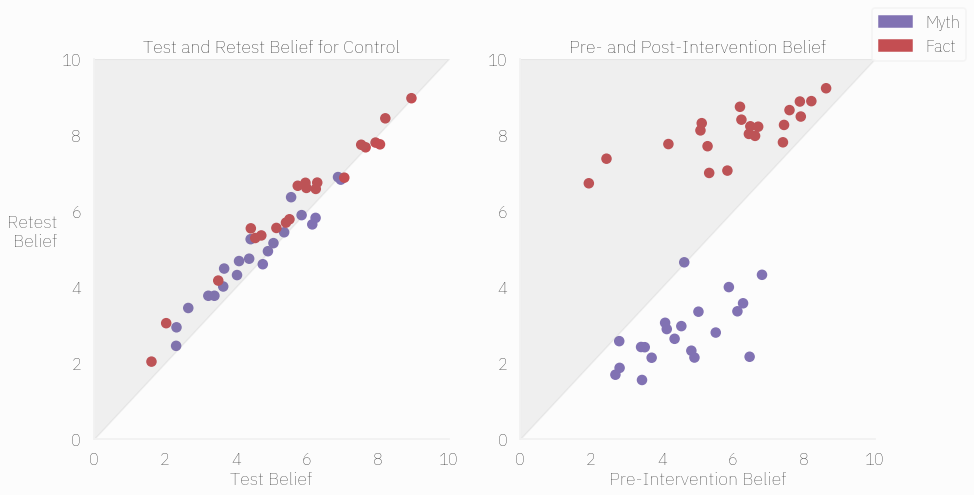

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
colors = [c3 if t else c4 for t in truth]
ax1.scatter(
    ctrl_b1.groupby("item").mean()["response"],
    ctrl_b2.groupby("item").mean()["response"],
    c=colors,
)

ax1.set_title("Test and Retest Belief for Control")
ax1.set_xlabel("Test Belief")
ax1.set_ylabel("Retest\nBelief", ha='right', rotation='horizontal')
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 10])
ax1.fill_between([0, 10], [0, 10], [10, 10], alpha=0.1, color='grey')


ax2.scatter(
    intr_b1.groupby("item").mean()["response"],
    intr_b2.groupby("item").mean()["response"],
    c=colors,
)

ax2.set_title("Pre- and Post-Intervention Belief")
ax2.set_xlabel("Pre-Intervention Belief")
#ax2.set_ylabel("Post-Intervention\nBelief", ha='right', rotation='horizontal')
ax2.set_xlim([0, 10])
ax2.set_ylim([0, 10])
ax2.fill_between([0, 10], [0, 10], [10, 10], alpha=0.1, color='grey')


fig.legend(
    (plt.Circle((0, 0), color=c4), plt.Circle((0, 0), color=c3)),
    ("Myth", "Fact")
)

Side-by-side:

Exp 1
![](exp1-item-scatter.png)

Exp 2
![](exp2-item-scatter.png)

In [15]:
deltas = pd.merge(item_group.query("type_ == 'Belief 1'"),
                 item_group.query("type_ == 'Belief 2'"),
                 on=[ID_COL, 'item'])[[ID_COL, 'item', 'response_x', 'response_y', 'condition_x']]

deltas = deltas.query("item in @myths")
deltas.eval("delta = response_y - response_x", inplace=True)
deltas.eval("backfire = delta >= 2", inplace=True)
deltas.eval("onept_backfire = delta >= 1", inplace=True)
deltas.eval("cond = 2 - condition_x", inplace=True) # maps to 0 = ctrl, 1 = intr
deltas.eval("b = 1", inplace=True)  # intercept

mod = sm.OLS(deltas.groupby(ID_COL)["backfire"].mean() * 100, 
             deltas.groupby(ID_COL)[["cond", "b"]].median())
res = mod.fit()
print("MSE = {:5.2f}".format(res.mse_resid))
print(res.summary())

MSE = 160.29
                            OLS Regression Results                            
Dep. Variable:               backfire   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     78.40
Date:                Sat, 26 Dec 2020   Prob (F-statistic):           3.10e-17
Time:                        12:53:44   Log-Likelihood:                -1534.5
No. Observations:                 388   AIC:                             3073.
Df Residuals:                     386   BIC:                             3081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cond         -11.3820      1.286     -8

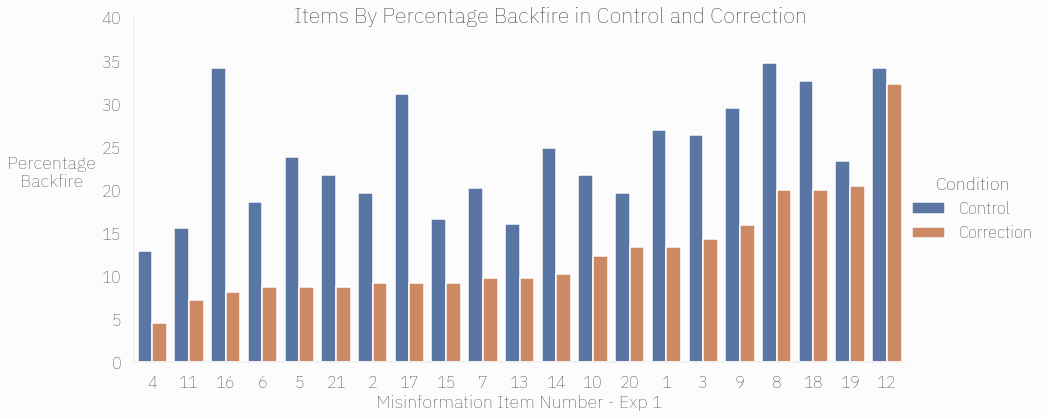

In [16]:
deltas_plot = deltas.eval("backfire = backfire * 100")
deltas_plot["item"]
deltas_plot["Condition"] = np.array(["Control", "Correction"])[deltas_plot["cond"]]
order = myth_intr_deltas.groupby("item").mean()["2pt_backfire"].sort_values().index
g = sns.catplot(data=deltas_plot, x="item", y="backfire", hue="Condition", kind="bar", 
                height=6, aspect=2, palette="deep", ci=None, order=order)

g.fig.suptitle("Items By Percentage Backfire in Control and Correction")
g.ax.set_xticklabels([list(exp2_myths).index(exp2_questions.index(q)) + 1 for q in 
                      np.array(questions)[order]])
g.ax.set_ylim([0, 40])
g.ax.set_xlabel("Misinformation Item Number - Exp 1")
g.ax.set_ylabel("Percentage\nBackfire", labelpad=50, rotation='horizontal');

In [17]:
deltas_plot

,What is your Prolific ID?,item,response_x,response_y,condition_x,delta,backfire,onept_backfire,cond,b,Condition
0,559e7713fdf99b7a9a12410b,0,2,1,2,-1,0,False,0,1,Control
1,55a43cf3fdf99b02ff6cb0b4,0,3,4,2,1,0,True,0,1,Control
2,55aa6c2ffdf99b632940aaaa,0,5,6,2,1,0,True,0,1,Control
3,55ac22cafdf99b6de2fa7ee2,0,5,5,2,0,0,False,0,1,Control
4,55b53384fdf99b2b69c82509,0,1,5,2,4,100,True,0,1,Control
...,...,...,...,...,...,...,...,...,...,...,...
8143,191,20,0,1,1,1,0,True,1,1,Correction
8144,192,20,1,3,1,2,100,True,1,1,Correction
8145,193,20,5,2,1,-3,0,False,1,1,Correction
8146,194,20,7,0,1,-7,0,False,1,1,Correction


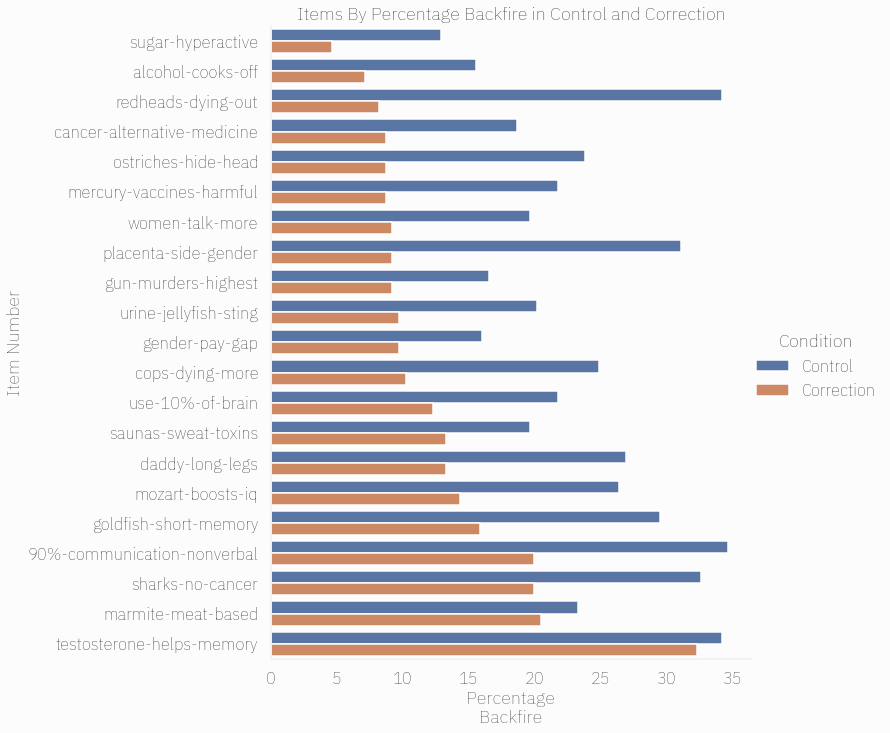

In [18]:
deltas_plot = deltas.eval("backfire = backfire * 100")
deltas_plot["Condition"] = np.array(["Control", "Correction"])[deltas_plot["cond"]]
order = myth_intr_deltas.groupby("item").mean()["2pt_backfire"].sort_values().index
g = sns.catplot(data=deltas_plot, y="item", x="backfire", hue="Condition", kind="bar", 
                height=10, aspect=0.8, palette="deep", orient='h', ci=None, order=order)
g.ax.set_title("Items By Percentage Backfire in Control and Correction")
g.ax.set_ylabel("Item Number")
g.ax.set_yticklabels([questions[i] for i in order])
g.ax.set_xlabel("Percentage\nBackfire");

In [19]:
# I'll be doing a lot of item-level regression plots, so I'm streamlining them here
def item_regplot(x, xlabel, y, ylabel, use_spearman=True, **kwargs):
    ax = sns.regplot(x, y, line_kws={'linestyle': ':'}, **kwargs)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel, rotation="horizontal", labelpad=30)
    ylabel_title = ylabel.replace('\n', ' ')
    ax.set_title(f"{xlabel} vs. {ylabel_title}")
    m, b, r, p, std_err = scipy.stats.linregress(x, y)
    if use_spearman:
        r, p = scipy.stats.spearmanr(x, y)
    print("m = {:.3f}, b = {:.3f}, r = {:.3f}, r^2 = {:.3f}, p = {:.3f}, std_err = {:.3f}".format(
        m, b, r, r ** 2, p, std_err))
    return ax

In [20]:
ctrl_items = ctrl.pivot_table(index=["item", ID_COL], columns="type_", values="response")
reliability = ctrl_items.groupby("item").corr('spearman').reset_index(-1).query(
    "type_ == 'Belief 1'")["Belief 2"]
r2 = reliability ** 2

intr_items = intr.pivot_table(index=["item", ID_COL], columns="type_", values="response")

all_items = item_group.pivot_table(index=["item", ID_COL], columns="type_", values="response")
fam = all_items.groupby("item").mean()["Familiarity"]
imp_soc = all_items.groupby("item").mean()["Importance (Society)"]
imp_you = all_items.groupby("item").mean()["Importance (You)"]

backfire_pct = myth_intr_deltas.groupby("item").mean()["2pt_backfire"] * 100

In [21]:
ctrl_items.index = ctrl_items.index.set_levels(questions, level=0)
ctrl_items.to_json('exp1-ctrl-items.json')

In [22]:
ctrl_items

type_                                         Belief 1  Belief 2  Familiarity  \
item               What is your Prolific ID?                                    
daddy-long-legs    559e7713fdf99b7a9a12410b          2         1            1   
                   55a43cf3fdf99b02ff6cb0b4          3         4           10   
                   55aa6c2ffdf99b632940aaaa          5         6            1   
                   55ac22cafdf99b6de2fa7ee2          5         5            0   
                   55b53384fdf99b2b69c82509          1         5            6   
...                                                ...       ...          ...   
humans-regrow-tips 5df7e8f04f849e5887601131          0         1            1   
                   5df954dd6e4db66e50368ba3          0         0            0   
                   5dfa88220826757e37a19403          0         5            0   
                   5dfabd623ccda281388d8931          0         0            0   
                   5dfac3beac9e1681fc7709c1          0         1            0   

type_                                         Importance (Society)  \
item               What is your Prolific ID?                         
daddy-long-legs    559e7713fdf99b7a9a12410b                      5   
                   55a43cf3fdf99b02ff6cb0b4                      6   
                   55aa6c2ffdf99b632940aaaa                      0   
                   55ac22cafdf99b6de2fa7ee2                      4   
                   55b53384fdf99b2b69c82509                      2   
...                                                            ...   
humans-regrow-tips 5df7e8f04f849e5887601131                      1   
                   5df954dd6e4db66e50368ba3                      0   
                   5dfa88220826757e37a19403                     10   
                   5dfabd623ccda281388d8931                     10   
                   5dfac3beac9e1681fc7709c1                      0   

type_                                         Importance (You)  
item               What is your Prolific ID?                    
daddy-long-legs    559e7713fdf99b7a9a12410b                  6  
                   55a43cf3fdf99b02ff6cb0b4                  6  
                   55aa6c2ffdf99b632940aaaa                  3  
                   55ac22cafdf99b6de2fa7ee2                  1  
                   55b53384fdf99b2b69c82509                  2  
...                                                        ...  
humans-regrow-tips 5df7e8f04f849e5887601131                  0  
                   5df954dd6e4db66e50368ba3                  0  
                   5dfa88220826757e37a19403                  7  
                   5dfabd623ccda281388d8931                 10  
                   5dfac3beac9e1681fc7709c1                  0  

[8106 rows x 5 columns]

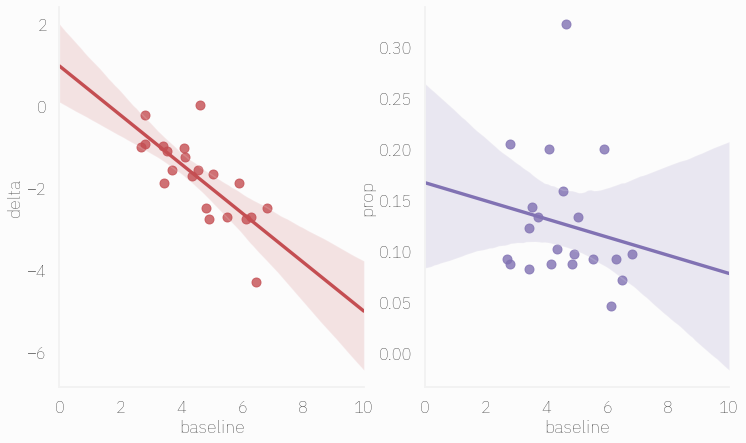

In [23]:
item_df = pd.DataFrame(index=pd.Index(myths, name='item'), data={
    "baseline": intr_b1.query('item in @myths').groupby("item").mean()["response"],
    "delta": myth_intr_deltas.groupby("item").mean()["response"],
    "prop": myth_intr_deltas.groupby("item").mean()["2pt_backfire"]})

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([0, 10])
sns.regplot(data=item_df, x='baseline', y='delta', ax=ax1, color=c3,
           truncate=False)
ax2.set_xlim([0, 10])
sns.regplot(data=item_df, x='baseline', y='prop', ax=ax2, color=c4,
           truncate=False)

In [24]:
print(repr(order))

Int64Index([3, 9, 14, 20, 4, 19, 1, 15, 13, 5, 11, 12, 8, 18, 0, 2, 7, 6, 16,
            17, 10],
           dtype='int64', name='item')


In [25]:
total_reliability = np.array([0.63921927, 0.56079646, 0.79577315, 0.51598188, 0.64273703,
       0.61198994, 0.66965719, 0.49903056, 0.68676344, 0.74459771,
       0.69050641, 0.71500667, 0.65452181, 0.69887468, 0.61967026,
       0.54275014, 0.64650692, 0.65886002, 0.60145748, 0.5388187 ,
       0.65180452])

In [26]:
both_reliability = np.array([0.61967026, 0.66965719, 0.54275014, 0.63921927, 0.64273703,
       0.74459771, 0.65886002, 0.64650692, 0.65452181, 0.56079646,
       0.65180452, 0.69050641, 0.71500667, 0.68676344, 0.79577315,
       0.49903056, 0.60145748, 0.5388187 , 0.69887468, 0.61198994,
       0.51598188, 0.74689085, 0.38405745, 0.63121094, 0.5830654 ,
       0.55901225, 0.61552713, 0.67440846, 0.59393233, 0.47780042,
       0.54614045, 0.63092465, 0.50254168, 0.60665113, 0.42462701,
       0.63751012, 0.72668038, 0.64108296, 0.74905876, 0.74818414,
       0.649331  , 0.69985335])

both_rel = both_reliability[[exp2_questions.index(q) for q in np.array(questions)[order]]]

m = -44.532, b = 39.956, r = -0.607, r^2 = 0.368, p = 0.004, std_err = 8.698


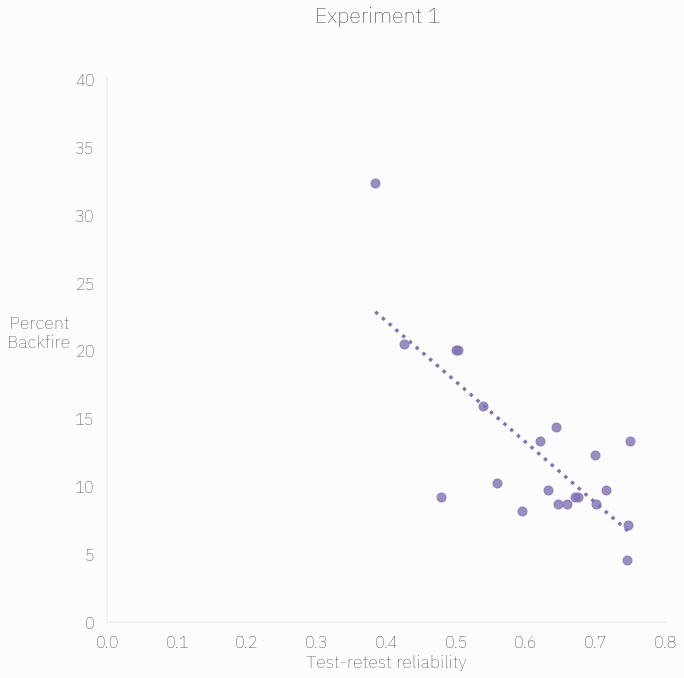

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim([0, 0.8])
ax.set_ylim([0, 40])
item_regplot(both_rel, "Test-retest reliability", backfire_pct[order], 
             "Percent   \nBackfire   ", 
             truncate=True, ci=None, ax=ax, color=c4, use_spearman=True)
fig.suptitle("Experiment 1");
ax.set_title('');

In [28]:
scipy.stats.spearmanr(both_rel, backfire_pct[order])

SpearmanrResult(correlation=-0.6067161812946371, pvalue=0.0035438298619332584)

### Other Correlations

Everything checks out. I haven't done the Bonferroni correction, but that's not super important here I don't think.

In [29]:
corr_df = pd.DataFrame({
    'Backfire': backfire_pct / 100,
    '$R^2$': r2,
    'Familiarity': fam,
    'Worldview (Society)': imp_soc,
    'Worldview (Personal)': imp_you
}, index=order)
print("r values:")
display(corr_df.corr('spearman').round(2))
print("p values:")
display(corr_df.corr(lambda x, y: scipy.stats.spearmanr(x, y)[1]).round(4))

r values:


,Backfire,$R^2$,Familiarity,Worldview (Society),Worldview (Personal)
Backfire,1.00,-0.58,-0.39,-0.15,-0.23
$R^2$,-0.58,1.00,0.68,0.25,0.32
Familiarity,-0.39,0.68,1.00,0.21,0.28
Worldview (Society),-0.15,0.25,0.21,1.00,0.93
Worldview (Personal),-0.23,0.32,0.28,0.93,1.00


p values:


,Backfire,$R^2$,Familiarity,Worldview (Society),Worldview (Personal)
Backfire,1.0000,0.0063,0.0813,0.5130,0.3144
$R^2$,0.0063,1.0000,0.0008,0.2706,0.1598
Familiarity,0.0813,0.0008,1.0000,0.3509,0.2158
Worldview (Society),0.5130,0.2706,0.3509,1.0000,0.0000
Worldview (Personal),0.3144,0.1598,0.2158,0.0000,1.0000


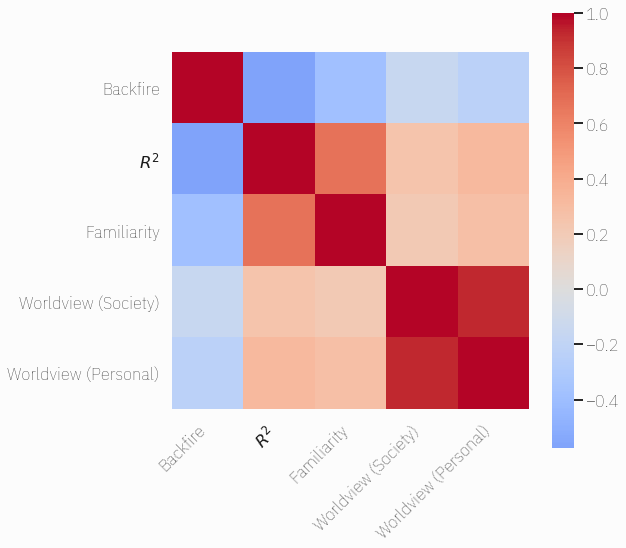

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_df.corr('spearman'), cmap='coolwarm', center=0, robust=True, ax=ax,
           square=True);
ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='y', labelrotation=0)
ax.set_xticklabels(ax.get_xticklabels(), ha='right');
ax.set_yticklabels(ax.get_yticklabels(), ha='right');

# Supplements
## Supplement B Table

In [31]:
myth_order = list(range(5)) + [20] + list(range(5, 20))
item_order = np.array(myth_order + list(range(21, 42)))

In [47]:
ctrl_b1.query('item == 0 and type_ == "Belief 1"')

,condition,What is your Prolific ID?,question,response,item,type_,cond,truth
0,2,559e7713fdf99b7a9a12410b,The daddy long legs spider is extremely venomo...,2,0,Belief 1,Control,0
1,2,55a43cf3fdf99b02ff6cb0b4,The daddy long legs spider is extremely venomo...,3,0,Belief 1,Control,0
2,2,55aa6c2ffdf99b632940aaaa,The daddy long legs spider is extremely venomo...,5,0,Belief 1,Control,0
3,2,55ac22cafdf99b6de2fa7ee2,The daddy long legs spider is extremely venomo...,5,0,Belief 1,Control,0
4,2,55b53384fdf99b2b69c82509,The daddy long legs spider is extremely venomo...,1,0,Belief 1,Control,0
...,...,...,...,...,...,...,...,...
188,2,5df7e8f04f849e5887601131,The daddy long legs spider is extremely venomo...,0,0,Belief 1,Control,0
189,2,5df954dd6e4db66e50368ba3,The daddy long legs spider is extremely venomo...,0,0,Belief 1,Control,0
190,2,5dfa88220826757e37a19403,The daddy long legs spider is extremely venomo...,0,0,Belief 1,Control,0
191,2,5dfabd623ccda281388d8931,The daddy long legs spider is extremely venomo...,4,0,Belief 1,Control,0


In [62]:
ctrl_items = ctrl_deltas.groupby('item')
intr_items = intr_deltas.groupby('item')

headers = ["Stimuli No. and Item", "Z score test between control and correction", "Reliability",
          "Exp 1 %Backfire Threshold 1", "Exp 1 %Backfire Threshold 2", "t test"]

rows = []
for (num, item) in enumerate(myth_order):
    row = []
    row.append("{} {}: {}".format(("Myth", "Fact")[truth[item]], num + 1, item_wordings[item]))
    # row.append("Z = {:.2f}, p = {:.3f}".format(*sm.stats.proportions_ztest(
    #    [ctrl_items.sum().loc[item, '1pt_backfire'], intr_items.sum().loc[item, '1pt_backfire']],
    #    [ctrl_items.count().loc[item, '1pt_backfire'], intr_items.count().loc[item, '1pt_backfire']],
    #    alternative='two-sided')))
    stat, pval = sm.stats.proportions_ztest(
        [ctrl_items.sum().loc[item, '2pt_backfire'], intr_items.sum().loc[item, '2pt_backfire']],
        [ctrl_items.count().loc[item, '2pt_backfire'], intr_items.count().loc[item, '2pt_backfire']],
        alternative='two-sided')
    if pval < 0.001:
        row.append("Z = {:.2f}, p < 0.001".format(stat))
    else:
        row.append("Z = {:.2f}, p = {:.3f}".format(stat, pval))
    row.append("{:4.2f}".format(reliability[item]))
    row.append("{:5.2f}".format(intr_items.mean().loc[item, '1pt_backfire'] * 100))
    row.append("{:5.2f}".format(intr_items.mean().loc[item, '2pt_backfire'] * 100))
    
    
    t, t_pval = scipy.stats.ttest_ind(ctrl_b1.query('item == @item')['response'],
                                     intr_b2.query('item == @item')['response'])
    if t_pval < 0.001:
        row.append("t = {:.2f}, p < 0.001".format(t))
    else:
        row.append("t = {:.2f}, p = {:.3f}".format(t, t_pval))
    rows.append(row)
    
supplement_b = pd.DataFrame(columns=headers, index=myths, data=rows)
supplement_b.to_json("exp1-results.json")
display(HTML(supplement_b.to_html().replace('\\n', '<br>')))

,Stimuli No. and Item,Z score test between control and correction,Reliability,Exp 1 %Backfire Threshold 1,Exp 1 %Backfire Threshold 2,t test
0,"Myth 1: The daddy long legs spider is extremely venomous, but fortunately its fangs are too small to pierce human skin","Z = 3.34, p < 0.001",0.73,18.46,13.33,"t = 6.15, p < 0.001"
1,"Myth 2: Females, on average, talk more than males","Z = 2.93, p = 0.003",0.73,14.36,9.23,"t = 6.91, p < 0.001"
2,Myth 3: Playing Mozart to your baby will boost its IQ.,"Z = 2.95, p = 0.003",0.66,21.54,14.36,"t = 4.15, p < 0.001"
3,Myth 4: Sugar makes children hyperactive.,"Z = 2.90, p = 0.004",0.76,8.21,4.62,"t = 8.68, p < 0.001"
4,Myth 5: Ostriches hide their head in the sand when frightened,"Z = 4.04, p < 0.001",0.64,13.33,8.72,"t = 9.07, p < 0.001"
5,"Myth 6: Cancer can be cured solely through alternative therapies, without standard cancer treatment","Z = 2.85, p = 0.004",0.69,14.87,8.72,"t = 1.61, p = 0.107"
6,Myth 7: Urine is an effective treatment for a jellyfish sting,"Z = 2.89, p = 0.004",0.74,14.36,9.74,"t = 8.64, p < 0.001"
7,Myth 8: Approximately 90% of communication is nonverbal,"Z = 3.25, p = 0.001",0.55,28.21,20.00,"t = 4.90, p < 0.001"
8,Myth 9: A goldfish's memory is approximately 7 seconds or less,"Z = 3.21, p = 0.001",0.56,22.05,15.90,"t = 4.48, p < 0.001"
9,Myth 10: Most people use between 10 and 50% of their brains,"Z = 2.48, p = 0.013",0.64,18.97,12.31,"t = 3.02, p = 0.003"
